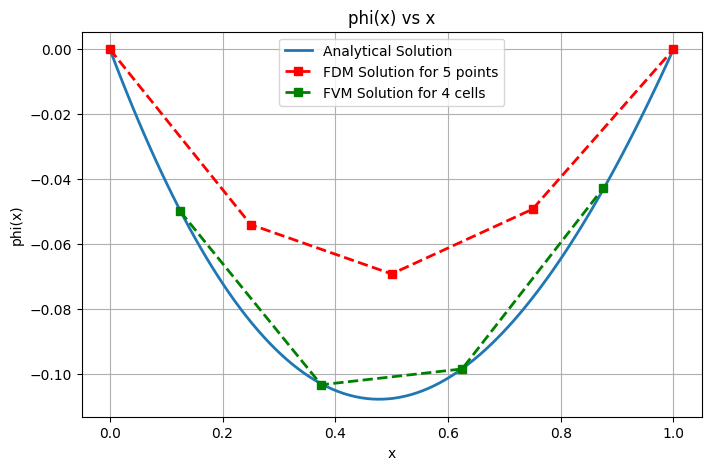

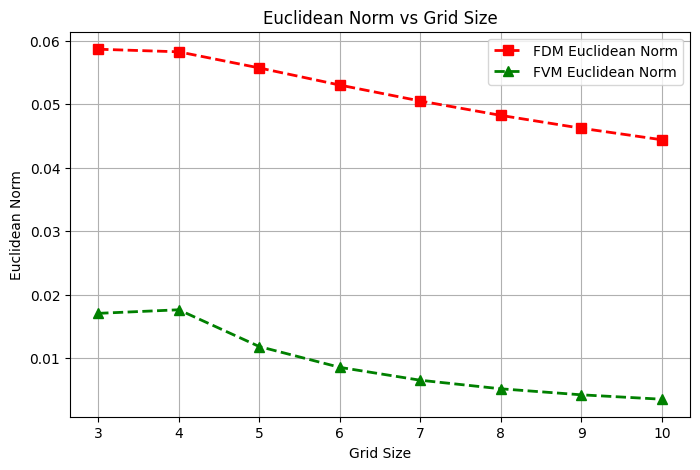

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Problem Setup
Nc = 4  # Number of cells for FVM
Np = 5  # Number of grid points for FDM
x_min, x_max = 0, 1  # Domain limits
dxc = (x_max - x_min) / Nc  # Cell width
dxp = (x_max - x_min) / Np  # Grid spacing
xc = np.linspace(x_min + dxc/2, x_max - dxc/2, Nc)  # Cell centers
xp = np.linspace(x_min, x_max, Np)  # Grid points

# Dirichlet BCs
phi_L = 0
phi_R = 0

# Analytical Solution
def analytical_solution(x):
  return 1-np.cos(x)+np.dot((np.cos(1)-1), x)

# FVM Solution
def FVM_solution(xc, dxc, Nc):
  # Constructing the coefficient matrix A
  k = [(1/np.square(dxc))*np.ones(Nc-1),(-2/np.square(dxc))*np.ones(Nc),(1/np.square(dxc))*np.ones(Nc-1)]
  offset = [-1,0,1]
  A = sp.sparse.diags(k,offset).toarray()
  A[0][0] = A[Nc-1][Nc-1] = -4/np.square(dxc)
  A[0][1] = A[Nc-1][Nc-2] = 4/(3*np.square(dxc))

  # Constructing the b matrix
  b = np.cos(xc)
  b[0] -= (8*phi_L)/(3*np.square(dxc))
  b[Nc-1] -= (8*phi_R)/(3*np.square(dxc))

  # Solving the equation A*phi=b, for phi
  phi, info = sp.sparse.linalg.cg(A,b)

  return phi

# FDM Solution
def FDM_solution(xp, dxp, Np):
  # Constructing the coefficient matrix A
  k = [(1/np.square(dxp))*np.ones(Np-1),(-2/np.square(dxp))*np.ones(Np),(1/np.square(dxp))*np.ones(Np-1)]
  offset = [-1,0,1]
  A = sp.sparse.diags(k,offset).toarray()
  A[0][0] = A[Np-1][Np-1] = 1
  A[0][1] = A[Np-1][Np-2] = 0

  # Constructing the b matrix
  b = np.cos(xp)
  b[0] = phi_L
  b[Np-1] = phi_R

  # Solving the equation A*phi=b, for phi
  phi, info = sp.sparse.linalg.cg(A,b)

  return phi

# Euclidean norm
def euclidean_norm(analytical_solution, numerical_solution):
  return np.sqrt(np.sum(np.square(analytical_solution - numerical_solution)))

# Plot Results
plt.figure(figsize=(8, 5))
x_analytical = np.linspace(x_min, x_max, 100)
plt.plot(x_analytical, analytical_solution(x_analytical), label='Analytical Solution', linewidth=2)
plt.plot(xp, FDM_solution(xp, dxp, Np), 'r--', label=f'FDM Solution for {Np} points', marker = "s", linewidth=2)
plt.plot(xc, FVM_solution(xc, dxc, Nc), 'g--', label=f'FVM Solution for {Nc} cells', marker = "s", linewidth=2)
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.legend()
plt.title('phi(x) vs x')
plt.grid()
plt.show()

# Calculate the Euclidean Norm
N_range = range(3,11)
euclidean_norm_FDM = []
euclidean_norm_FVM = []
for N in N_range:
  xc = np.linspace(x_min + dxc/2, x_max - dxc/2, N)  # Cell centers
  xp = np.linspace(x_min, x_max, N)  # Grid points
  dxc = (x_max - x_min) / N  # Cell width
  dxp = (x_max - x_min) / N  # Grid spacing
  euclidean_norm_FDM.append(euclidean_norm(analytical_solution(xp), FDM_solution(xp, dxp, N)))
  euclidean_norm_FVM.append(euclidean_norm(analytical_solution(xc), FVM_solution(xc, dxc, N)))

# Plot the Euclidean Norm
plt.figure(figsize=(8, 5))
plt.plot(N_range, euclidean_norm_FDM, 'r--', label='FDM Euclidean Norm', marker = "s", ms = 7, linewidth=2)
plt.plot(N_range, euclidean_norm_FVM, 'g--', label='FVM Euclidean Norm', marker = "^", ms = 7, linewidth=2)
plt.xlabel('Grid Size')
plt.ylabel('Euclidean Norm')
plt.legend()
plt.title('Euclidean Norm vs Grid Size')
plt.grid()
plt.show()
